   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  
Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
U

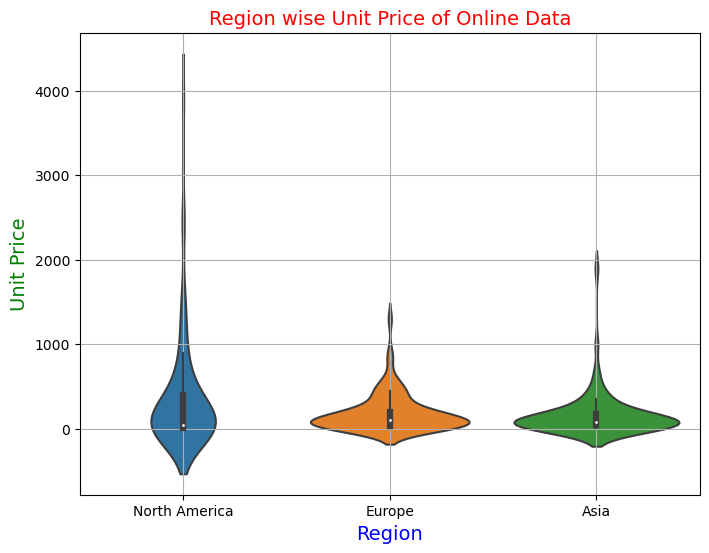

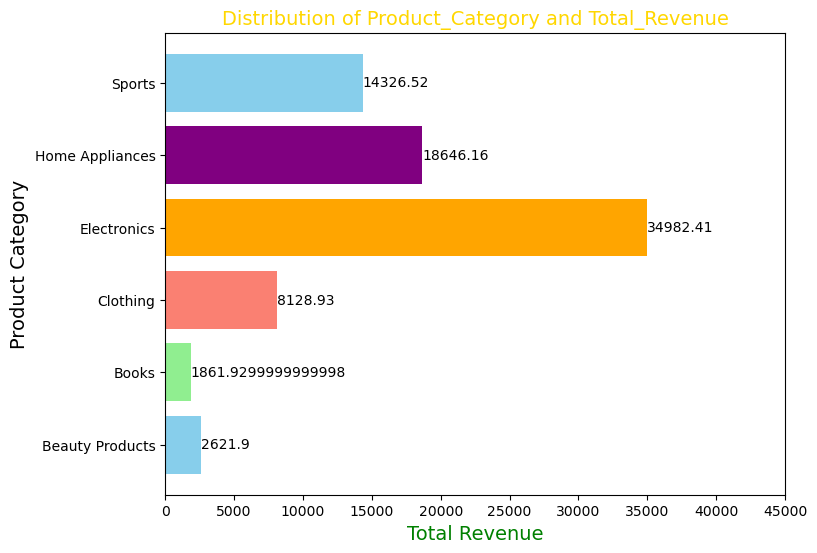

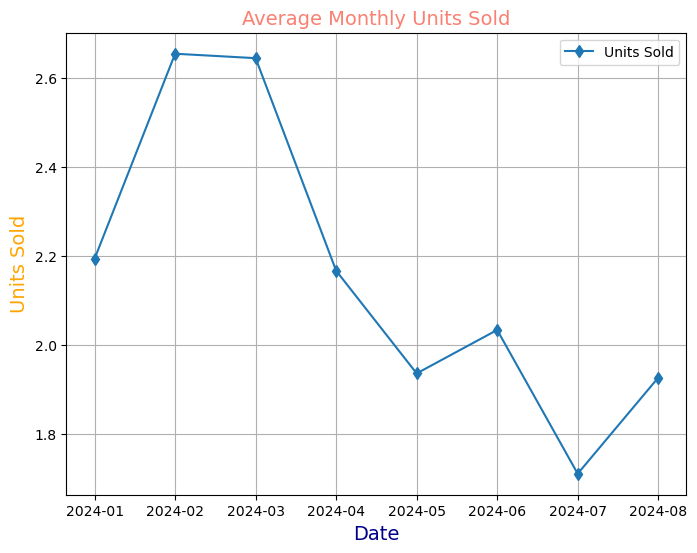

(                Count          Mean     Std Dev      Min        25%       50%  \
 Transaction ID  240.0  10120.500000   69.426220  10001.0  10060.750  10120.50   
 Units Sold      240.0      2.158333    1.322454      1.0      1.000      2.00   
 Unit Price      240.0    236.395583  429.446695      6.5     29.500     89.99   
 Total Revenue   240.0    335.699375  485.804469      6.5     62.965    179.97   
 
                       75%       Max  Skewness  Kurtosis     Median  
 Transaction ID  10180.250  10240.00  10120.50  0.000000  -1.200000  
 Units Sold          3.000     10.00      2.00  1.620895   4.775699  
 Unit Price        249.990   3899.99     89.99  4.566664  28.234405  
 Total Revenue     399.225   3899.99    179.97  3.523183  16.681918  ,
        count      mean       std       min       25%       50%       75%  \
 count    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 mean     NaN  1.000000 -0.454540  0.999617  0.999728  0.999895  0.999986   
 std  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")


# reading data
def readonl_data(data):
    """
    Reads the CSV file, returns Online_data as df DataFrame.
    """
    df = pd.read_csv(data)
    return df


#lineplot(Relational graph)
def average_Monthly_Units_Sold(monthly_data):
    """
    Plots the average monthly units sold over time.

    Parameters:
    monthly_data (DataFrame): DataFrame with 'YearMonth' and 'Units Sold' columns.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(monthly_data['YearMonth'].astype(str), monthly_data['Units Sold'], '-d', label='Units Sold')
    plt.title('Average Monthly Units Sold', size=14, color="salmon")
    plt.grid()
    plt.xlabel('Date', size=14, color ="#00008B")
    plt.ylabel('Units Sold', size=14, color="orange")
    plt.legend()
    plt.show()


#violinplot plot
def violinplot_for_Region_Unitprice(data):
    """
    Creates a violin plot for 'Region' vs. 'Unit Price'.
    Parameters:
    data (DataFrame): DataFrame with 'Region' and 'Unit Price' columns.
    """
    
    plt.figure(figsize=(8, 6))
    plt.title('Region wise Unit Price of Online Data', fontsize=14, color="red")
    sns.violinplot(data=data, x='Region', y='Unit Price')
    #custom_lines = [plt.Line2D([0], [0], color='b', lw=4)]
    plt.xlabel('Region', fontsize=14, color="blue")
    plt.ylabel('Unit Price', fontsize=14, color="green")
    plt.grid(True)
    plt.show()


#Bar graph
def productcategory_total_Revenue(prod_lst, prod_values):
    """
    Plots a horizontal bar chart of product categories and their total revenue.

    Parameters:
    prod_lst (list): List of product categories.
    prod_values (list): List of total revenue values corresponding to the product categories.
    """
    
    plt.figure(figsize=(8, 6))
    colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']
    bars = plt.barh(prod_lst, prod_values, color=colors[:len(prod_lst)])
    for i, bar in enumerate(bars):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, prod_values[i], ha='left', va='center')
    plt.xlabel('Total Revenue',fontsize=14,color="Green")
    plt.xlim(0, 45000)
    plt.ylabel('Product Category',fontsize=14)
    plt.title('Distribution of Product_Category and Total_Revenue',fontsize=14, color="Gold")
    plt.show()


#calculate All statics
def cal_statics(online_data):
    """
    Calculate various statistics and the correlation matrix for the numeric columns of a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    tuple: A tuple containing two elements:
        - statistics_df (pd.DataFrame): A DataFrame with the following statistics for each numeric column:
            Count , Mean, Standard Deviation (Std Dev), Minimum (Min), 25th percentile (25%)
            Median (50%), 75th percentile (75%), Maximum (Max), Skewness, Kurtosis
        - correlation_data (pd.DataFrame): The correlation matrix of the numeric columns.
    """

    numeric_col = online_data.select_dtypes(include=['int', 'float']).columns
    moments = online_data[numeric_col].describe().transpose()
    median = online_data[numeric_col].median()
    skewness = online_data[numeric_col].skew()
    kurtosis = online_data[numeric_col].kurtosis()
    statistics_df = pd.concat([moments, median, skewness, kurtosis], axis=1)
    statistics_df.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Median']
    correlation_data=moments.corr()
    return statistics_df,correlation_data


#====================================================
# Main script execution ,Preprocess data
Online_prod_data = readonl_data('Online.csv' )

#to get 5 records data
print(Online_prod_data.head(5))

#check any null values are there or not
print(Online_prod_data.isnull().sum())

# line plot for Rainfall and ph_value
violinplot_for_Region_Unitprice(Online_prod_data)

#bar chart for crops percentage
prod_groups = Online_prod_data.groupby('Product Category')['Total Revenue'].sum()
prod_lst = prod_groups.index.tolist()
prod_values = prod_groups.values
productcategory_total_Revenue(prod_lst,prod_values)

#Avg monthly Units sold
Online_prod_data["Date"] = pd.to_datetime(Online_prod_data["Date"])
Online_prod_data['YearMonth'] = Online_prod_data['Date'].dt.to_period('M')#Extract month and year from the 'Date' column
monthly_data = Online_prod_data.groupby('YearMonth')['Units Sold'].mean().reset_index()# Group by'YearMonth' column, mean price for each month
average_Monthly_Units_Sold(monthly_data)

#Calculate Statics
cal_statics(Online_prod_data)